
¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-warning">

<b>Comentario del revisor</b> <a class="tocSkip"></a>


Diego, cuando hacemos análisis de datos es muy útil escribir una introducción al proyecto donde se especifiquen claramente los objetivos y se explique el propósito del mismo. Es esencial hacer esto para establecer las bases del proyecto y aclarar lo que buscamos alcanzar. Con la introducción, queda de manera clarar el análisis que desarrollaremos en el proyecto y cómo lo pretendemos abordar.</div>

En este analisis buscaremos analizar si el tiempo de traslado hacie el aeropuerto internacional de O'Hare desde Loop los sábados lluviosos es más tardado que cuando hay buen clima. Igualmente comprobaremos cuales son los 10 vecindarios a dodne más piden viajes y las compañias de taxi más usadas

In [1]:
import pandas as pd

In [2]:
#Recuperando los datos del CSV
dataset_01 = pd.read_csv('/datasets/project_sql_result_01.csv')
dataset_04 = pd.read_csv('/datasets/project_sql_result_04.csv')
dataset_07 = pd.read_csv('/datasets/project_sql_result_07.csv')

<div class="alert alert-block alert-warning">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recuerda que como buena prática es recomendable cargar todas las bases de datos en una misma celda. Es por ello que te recomiendo cargar la base faltante en esta misma celda..</div>



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

In [3]:
#Imprimiendo las primeras filas del dataset_01
print(dataset_01.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [4]:
#Obteniendo la información del dataset_01
dataset_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
#Imrpimiendo las primeras filas del dataset_04
print(dataset_04.head())

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [6]:
#Obteniendo la información del dataset_04
dataset_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [23]:
#buscar duplciados datasets
dataset_01.duplicated().sum()

0

In [22]:
dataset_04.duplicated().sum()

0

In [21]:
dataset_07.duplicated().sum()

197

In [33]:
dataset_07_drop_duplicates = dataset_07.drop_duplicates()


In [34]:
dataset_07_drop_duplicates.duplicated().sum()

0

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Para estos análisis iniciales te recomiendo verificar si contamos con registros duplicados</div>



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

In [8]:
#Empresas de taxis y números de viaje
trips_per_company = dataset_01.sort_values(by='trips_amount', ascending=False).head(10)

trips_per_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [9]:
# Identificar los 10 principales barrios en términos de finalización del recorrido
top_10_neighborhoods = dataset_04.sort_values(by='average_trips', ascending=False).head(10)

top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


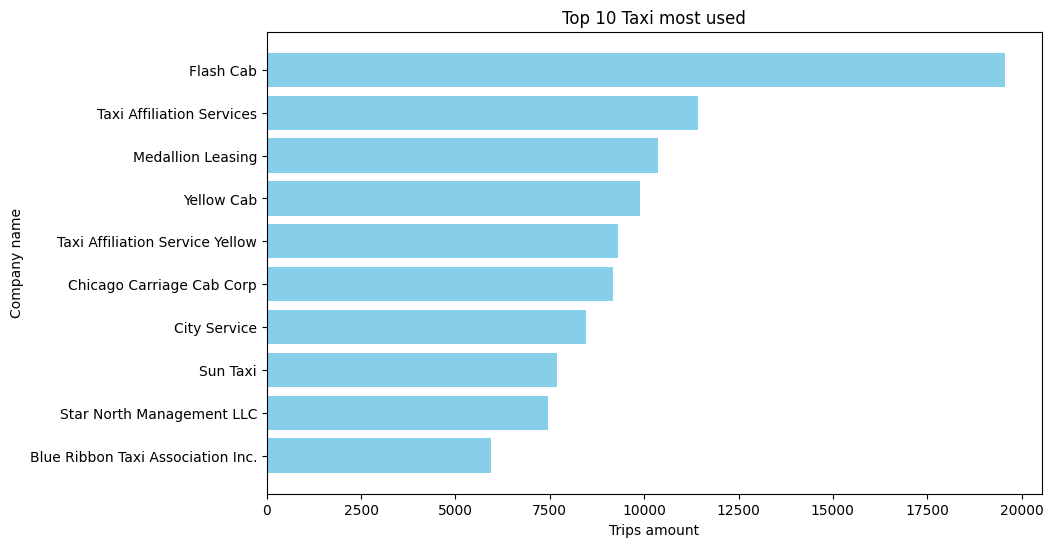

In [10]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras para las 10 empresas por número de viajes
plt.figure(figsize=(10, 6))
plt.barh(trips_per_company['company_name'], trips_per_company['trips_amount'], color='skyblue')
plt.xlabel('Trips amount')
plt.ylabel('Company name')
plt.title('Top 10 Taxi most used')
plt.gca().invert_yaxis()  # Invertir el eje y para que el barrio con más viajes esté arriba
plt.show()

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el desarrollo de la gráfica para visualizar los resultados. Solamente dado que al cliente le interesa el top 10 de las principales empresas con número de viajes, te recomiendo complementar este análisis con una gráfica solamente mostrando el top 10.</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

Flash Cab es por mucho la empresa con mayor número de viajes en comparación con las demás

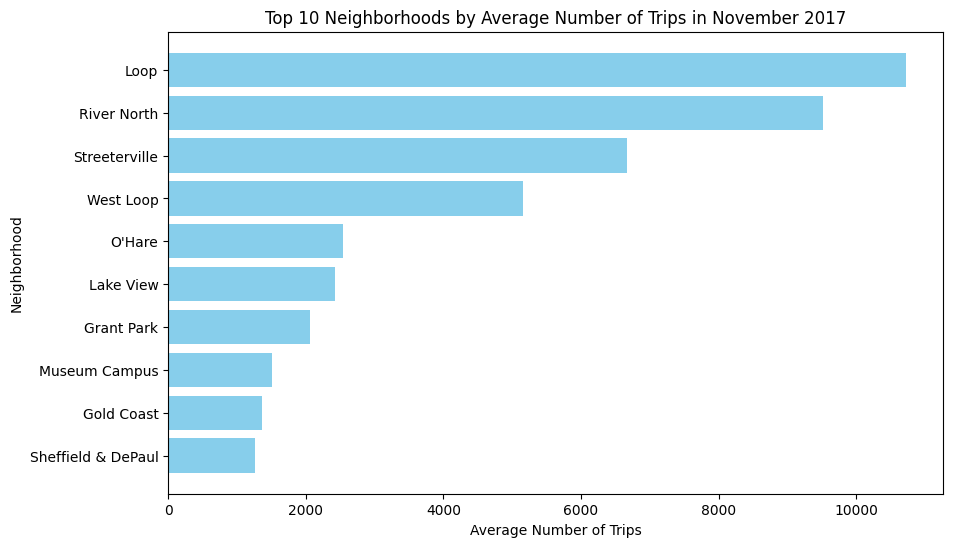

In [11]:

# Crear un gráfico de barras para los 10 barrios principales por número de viajes promedio
plt.figure(figsize=(10, 6))
plt.barh(top_10_neighborhoods['dropoff_location_name'], top_10_neighborhoods['average_trips'], color='skyblue')
plt.xlabel('Average Number of Trips')
plt.ylabel('Neighborhood')
plt.title('Top 10 Neighborhoods by Average Number of Trips in November 2017')
plt.gca().invert_yaxis()  # Invertir el eje y para que el barrio con más viajes esté arriba
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis y lo complementaste con una gráfica.
    </div>

Conclusiones

Loop y River North son los barrios con el mayor número promedio de finalizaciones de viajes ya que estas áreas son centros comerciales y de negocios en Chicago.
Importancia de los centros de transporte:

O'Hare aparece en el top 5, lo que refleja la importancia del aeropuerto internacional como un destino principal para los taxis. Esto indica que muchos viajeros optan por tomar taxis hacia o desde el aeropuerto.

Lake View y Sheffield & DePaul son barrios residenciales populares que también aparecen en la lista. Estos barrios tienen una alta densidad de población.

In [13]:
print(dataset_07.sample(10))

                 start_ts weather_conditions  duration_seconds
773   2017-11-11 11:00:00               Good            2032.0
449   2017-11-18 10:00:00                Bad            1560.0
215   2017-11-11 09:00:00               Good            1260.0
733   2017-11-11 10:00:00               Good            1466.0
1013  2017-11-11 15:00:00               Good            2200.0
625   2017-11-04 16:00:00                Bad            3540.0
588   2017-11-04 18:00:00                Bad            2580.0
72    2017-11-04 14:00:00               Good            3084.0
359   2017-11-18 16:00:00                Bad            2820.0
303   2017-11-18 14:00:00               Good            3780.0


In [14]:
dataset_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [44]:
from scipy.stats import ttest_ind, levene

#Convertir el tiempo a formato datetime y extraer el día de la semana
dataset_07_drop_duplicates['start_ts'] = pd.to_datetime(dataset_07_drop_duplicates['start_ts'])
dataset_07_drop_duplicates['day_of_week'] = dataset_07_drop_duplicates['start_ts'].dt.day_name()
dataset_07_drop_duplicates['is_saturday'] = dataset_07_drop_duplicates['day_of_week'] == 'Saturday'

#Filtrar los datos para obtener solo los sábados
saturday_data = dataset_07_drop_duplicates[dataset_07_drop_duplicates['is_saturday']]
saturday_data

/tmp/ipykernel_50/630324213.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_07_drop_duplicates['start_ts'] = pd.to_datetime(dataset_07_drop_duplicates['start_ts'])
/tmp/ipykernel_50/630324213.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_07_drop_duplicates['day_of_week'] = dataset_07_drop_duplicates['start_ts'].dt.day_name()
/tmp/ipykernel_50/630324213.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,start_ts,weather_conditions,duration_seconds,day_of_week,is_saturday
0,2017-11-25 16:00:00,Good,2410.0,Saturday,True
1,2017-11-25 14:00:00,Good,1920.0,Saturday,True
2,2017-11-25 12:00:00,Good,1543.0,Saturday,True
3,2017-11-04 10:00:00,Good,2512.0,Saturday,True
4,2017-11-11 07:00:00,Good,1440.0,Saturday,True
...,...,...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0,Saturday,True
1061,2017-11-18 16:00:00,Bad,2186.0,Saturday,True
1063,2017-11-25 11:00:00,Good,0.0,Saturday,True
1064,2017-11-11 10:00:00,Good,1318.0,Saturday,True


In [45]:
# Filtrar los datos de sábados lluviosos y no lluviosos
rainy_conditions = ['Bad']
rainy_saturday_data = saturday_data[saturday_data['weather_conditions'].isin(rainy_conditions)]
non_rainy_saturday_data = saturday_data[~saturday_data['weather_conditions'].isin(rainy_conditions)]


In [46]:
# Realizar la prueba t de muestras independientes
rainy_durations = rainy_saturday_data['duration_seconds']
non_rainy_durations = non_rainy_saturday_data['duration_seconds']

levene_stat, levene_p_value = levene(rainy_durations, non_rainy_durations)

# Determinar si las varianzas son iguales
if levene_p_value > 0.05:
    equal_var = True
else:
    equal_var = False

# Realizar la prueba t de muestras independientes con base en el resultado de Levene
t_stat, p_value = ttest_ind(rainy_durations, non_rainy_durations, equal_var=equal_var)

# Resultados
print("Estadístico t:", t_stat)
print("Valor p:", p_value)

# Escoger la hipótesis
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: La duración promedio de los viajes cambia en los sábados con mal tiempo.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para afirmar que la duración promedio de los viajes cambia en los sábados con mal tiempo.")



Estadístico t: 5.427957689754561
Valor p: 7.397770692813658e-08
Rechazamos la hipótesis nula: La duración promedio de los viajes cambia en los sábados con mal tiempo.


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para esta prueba te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocas como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de los días (lluvioso y no lluvioso) debes de hacer uso de la siguiente función: 
    
    levene(rainy_saturday_trips['duration_seconds'], non_rainy_saturday_trips ['duration_seconds'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var".  Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene.  
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

El planteamiento de las hipotésis nula fue con base a la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia en los sábados lluviosos.
Esto significa que no hay una diferencia significativa en la duración promedio de los viajes entre los sábados lluviosos y los sábados no lluviosos.

La hipotesis alternativa sería lo contrario es decir que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia en los sábados lluviosos.
Aquí se postula que existe una diferencia significativa en la duración promedio de los viajes entre los sábados lluviosos y los no lluviosos. Si la hipótesis alternativa es cierta, entonces los sábados lluviosos afectan la duración del viaje.

El criterio usado para probar las hipótesis fue una prueba t de muestras independientesya que una prueba t de muestras independientes compara las medias de dos grupos independientes, las duraciones de los viajes en sábados lluviosos y las duraciones en sábados no lluviosos. Queriamos comprobar si las medias de los dos son significativamente diferentes.








<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general, considero que realizaste un excelente trabajo con el proyecto. Lograste limpiar y organizar las bases de datos eficazmente. Además, tu análisis exploratorio fue exhaustivo, presentando resultados relevantes que serán muy útiles para la toma de decisiones. También, desarrollaste las pruebas de hipótesis de manera acertada. Sin embargo, siempre hay espacio para mejorar y quisiera señalar algunos aspectos que podrías considerar:


* Realizar un análisis de duplicados
    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos.    
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
*  Profundizar en los resultados intermedios y en la conclusión final.
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>